In [25]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Feynn/mcdonalds.csv')

In [21]:
#Data exploration
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [22]:
data.shape

(1453, 15)

In [31]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [35]:
data.replace('I hate it!-5', -5, inplace=True)
data.replace('I love it!+5', 5, inplace=True)

In [36]:
counts = data.nunique()
counts

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

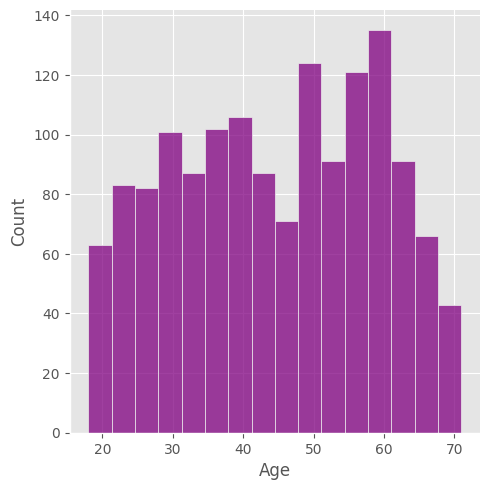

In [29]:
sns.displot(data["Age"], bins=16, color="purple")

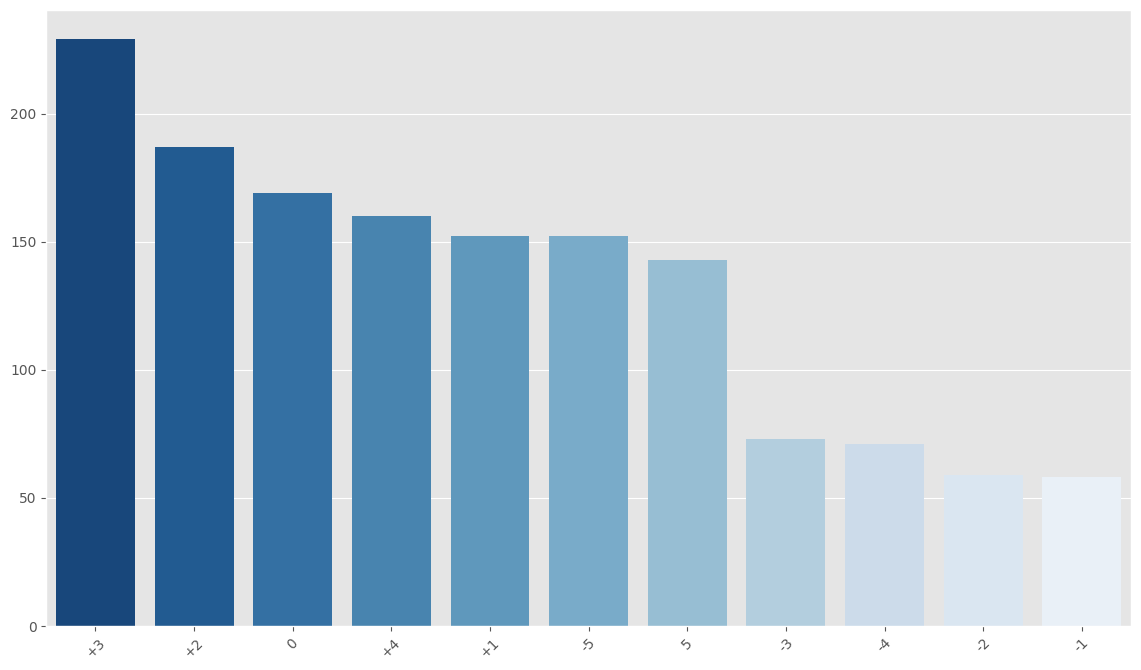

In [38]:
like = data['Like'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =like.index , y =like.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder
data.dropna(inplace=True)
data['Gender'].unique()
gender_label = LabelEncoder()
data['Gender']=gender_label.fit_transform(data['Gender'])
data = data.astype({'Like':'int'})
like_encoder = LabelEncoder()
data['Like'] = like_encoder.fit_transform(data['Like'])
visit_encoder = LabelEncoder()
data['VisitFrequency']=visit_encoder.fit_transform(data['VisitFrequency'])
data


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,2,61,0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,7,51,0,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,6,62,0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,9,69,4,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,7,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,0,47,5,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,7,36,4,0
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,8,52,3,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,9,41,0,1


In [54]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,7,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,0,1


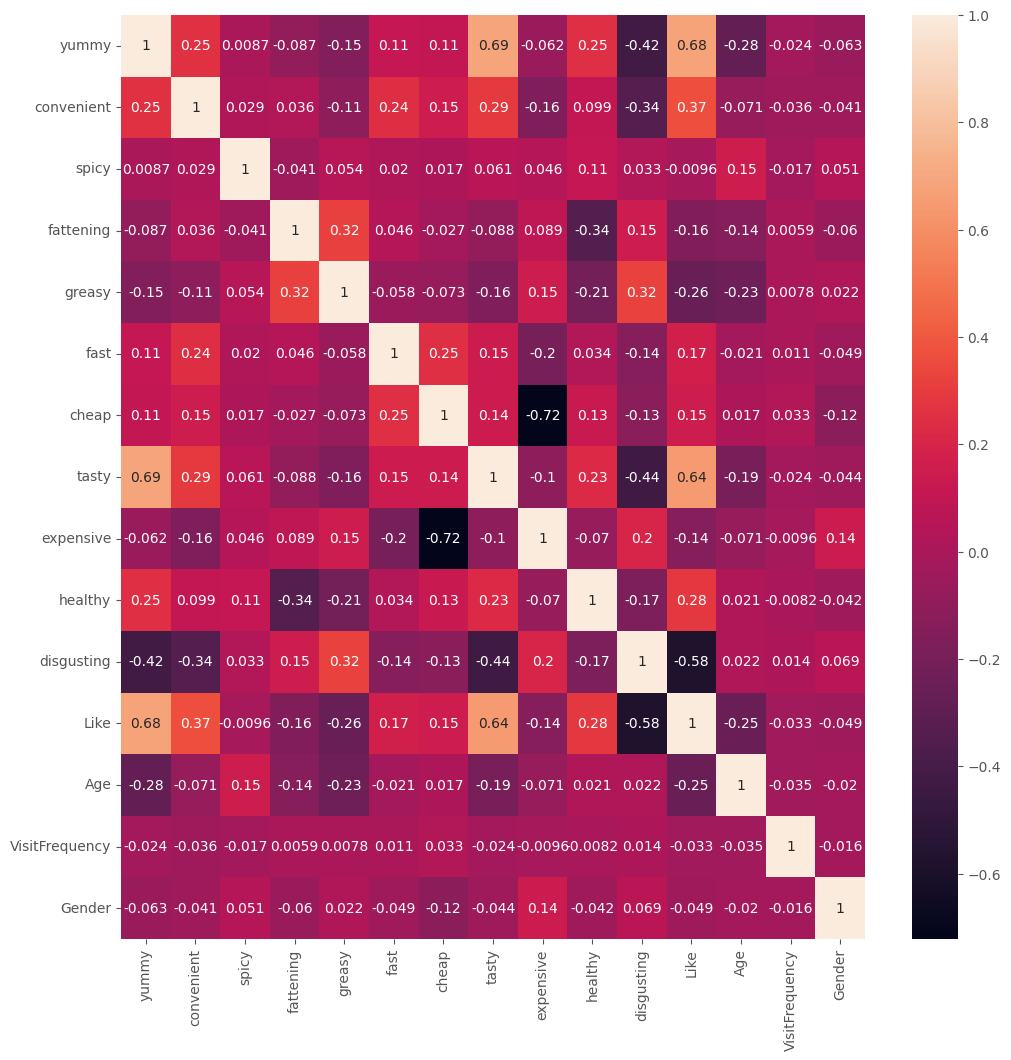

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [56]:
data.mean(axis=0)

yummy              0.552650
convenient         0.907777
spicy              0.093599
fattening          0.867171
greasy             0.526497
fast               0.900206
cheap              0.598761
tasty              0.644184
expensive          0.357880
healthy            0.198899
disgusting         0.242946
Like               5.777013
Age               44.604955
VisitFrequency     2.637990
Gender             0.457674
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [57]:
#Using PCA
from sklearn.decomposition import PCA
pca_data = PCA(n_components=11)
principalComponents_data = pca_data.fit_transform(data)

In [12]:
principal_mcd_Df = pd.DataFrame(data = principalComponents_data)
principal_mcd_Df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [13]:
principal_mcd_Df.std()

0     0.757050
1     0.607456
2     0.504619
3     0.398799
4     0.337405
5     0.310275
6     0.289697
7     0.275122
8     0.265251
9     0.248842
10    0.236903
dtype: float64

In [14]:
principal_mcd_Df.var()

0     0.573124
1     0.369002
2     0.254641
3     0.159040
4     0.113842
5     0.096270
6     0.083925
7     0.075692
8     0.070358
9     0.061922
10    0.056123
dtype: float64

In [39]:
#Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5)
kmeans.fit(seg_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

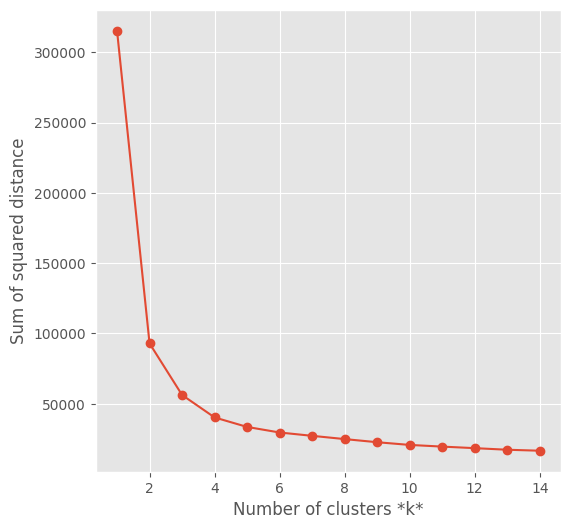

In [58]:
#Optimum k val
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');